In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Our first step is to import our players and sessions data.

In [2]:
players_data <- read_csv("https://raw.githubusercontent.com/Parsa-Sha/DSCI_100_Project/refs/heads/main/data/players.csv")
players_data
sessions_data <- read_csv("https://raw.githubusercontent.com/Parsa-Sha/DSCI_100_Project/refs/heads/main/data/sessions.csv")
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


# (1) <br>

The players data set represents a collection of players who have chosen to play on the Minecraft server provided by the researchers, and it includes their experience, subscribed status, hashed email, played hours, name, gender, and age. There are a total of 196 observations, and seven variables total.

The sessions data set represents a collection of sessions on the Minecraft server, and it includes their hashed email, and the start time and end time (both in standard date/time and UNIX)

Lets describe the meaning of each column, along with any issues related to the data:

| Data | Type | Explaination |
|:--------:|:--------:|:--------|
|  experience   |  Character   |  This column represents the past history of each player, and how much expertise they have in the game. It should be a factor, since there are limited experience levels. We can fix this by using "as_factor()". We will be using this in our observation.   |
|  subscribed   |  Factor   |  This column represents whether the player is subscribed to the service or not.   |
|  hashedEmail   |  Character   |  This column represents the email of the user who logged in to the Minecraft server to play. This information is not currently of use to us, other than being unique for each row, serving as an identifier. This column appears both in the players data and the sessions data. |
|  played_hours   |  Double   |  This column represents the number of hours played. We will be using this in our observation.   |
|  name   |  Character   |  This column represents the name of the player.    |
|  gender   |  Character   |  This column represents the name of the player.   |
|  Age   |  Double   |  This column represents the age of the player.  |
| start_time |  Character   |  This column represents the start time of the player. in standard datetime format. Note that this column makes the sessions data untidy, as the year, month, day, etc. are all part of one column, when tidy data would have them in seperate columns. |
| end_time |  Character   |  This column represents the end time of the player. in standard datetime format. Note that this column makes the sessions data untidy, as the year, month, day, etc. are all part of one column, when tidy data would have them in seperate columns. |
| original_start_time |  Double   |  This column represents the start time of the player. in UNIX datetime format. |
| original_end_time |  Double   |  This column represents the end time of the player. in UNIX datetime format. |


Overall, there do not appear to be many issues with the data. The "played_hours" variable stored as a decimal number, instead of an hours variable and a seperate minutes variable may be a concern depending on what is done do the data, but for our planned visualizaition, it is better as a decimal.

Let's collect aggregated statistics across the numerical data. We will need to use "na.rm = TRUE" to filter out the missing values

In [3]:
players_numerical <- select(players_data, played_hours, Age)

players_min <- map_df(players_numerical, min, na.rm = TRUE)
players_mean <- map_df(players_numerical, mean, na.rm = TRUE)
players_max <- map_df(players_numerical, max, na.rm = TRUE)

players_min
players_mean
players_max

played_hours,Age
<dbl>,<dbl>
0,8


played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


played_hours,Age
<dbl>,<dbl>
223.1,50


From this data, we can see that the average number of hours played is about 5.85 hours, with a minimum of 0 hours (no time played), and a maximum of 223.1 hours.

Additionally, the average age is roughly 20-21 years old, with the youngest player being 8 years of age, and the oldest being 50 years of age.

Here is the aggregation data in a table:

| Data | Minimum | Average | Maximum |
|:--------:|:--------:|:--------:|:--------:|
|  Age   |  0   |  20.52   | 50 |
|  played_hours   |  8   |  5.85   | 223.1 |

# (2) <br>

From here, lets combine the "players_data" and the "sessions_data", and gather additional data about each player from the sessions_data, such as how many sessions they had, their longest session, their shortest session, and the average session length. We'll also convert "experience" into a factor variable, and collect an average to test for any missing values:

In [4]:
players_reformatted <- players_data |>
    mutate(experience = as_factor(experience))

total_data <- left_join(sessions_data, players_reformatted)

total_data_with_durations <- total_data |>
    mutate(duration = (original_end_time - original_start_time)) 
    # Add durations, kept in milliseconds for accuracy

# Then, get session count, and aggregated duration statistics per user.
session_count <- total_data_with_durations |>
    group_by(hashedEmail) |>
    summarize(number_of_sessions = n())

min_duration <- total_data_with_durations |>
    group_by(hashedEmail) |>
    summarize(min_duration = min(duration))

mean_duration <- total_data_with_durations |>
    group_by(hashedEmail) |>
    summarize(mean_duration = mean(duration))

max_duration <- total_data_with_durations |>
    group_by(hashedEmail) |>
    summarize(max_duration = max(duration))

players_and_sc <- left_join(players_reformatted, session_count) |>
    merge(y = min_duration, by = "hashedEmail", all = TRUE) |>
    merge(y = mean_duration, by = "hashedEmail", all = TRUE) |>
    merge(y = max_duration, by = "hashedEmail", all = TRUE)

players_and_sc

session_average <- select(players_and_sc, number_of_sessions) |>
    map_df(mean)

session_average

Joining with `by = join_by(hashedEmail)`
Joining with `by = join_by(hashedEmail)`


hashedEmail,experience,subscribe,played_hours,name,gender,Age,number_of_sessions,min_duration,mean_duration,max_duration
<chr>,<fct>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,2,0,5e+06,1e+07
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,NA,NA,NA,NA
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,1,0,0e+00,0e+00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,Amateur,TRUE,56.1,Dana,Male,23,310,0e+00,967741.9,1e+07
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,Amateur,TRUE,0.1,Fatima,Male,17,1,0e+00,0.0,0e+00
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,Beginner,TRUE,1.1,Caden,Male,20,1,1e+07,10000000.0,1e+07


number_of_sessions
<dbl>
NA


Comparing the size of the session count data and the players data, we can see that there are less players who have at least one session than there are players. This means that there are players that have signed up, but have not done a single session. Lets fix this:

In [5]:
players_and_sc <- players_and_sc |> # Replace missing values with 0
    mutate(number_of_sessions = ifelse(is.na(number_of_sessions), 0, number_of_sessions)) |>
    mutate(min_duration = ifelse(is.na(min_duration), 0, min_duration)) |>
    mutate(mean_duration = ifelse(is.na(mean_duration), 0, mean_duration)) |>
    mutate(max_duration = ifelse(is.na(max_duration), 0, max_duration))

players_and_sc

print(select(players_and_sc, number_of_sessions) |>
    map_df(mean))

hashedEmail,experience,subscribe,played_hours,name,gender,Age,number_of_sessions,min_duration,mean_duration,max_duration
<chr>,<fct>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,2,0,5e+06,1e+07
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,Veteran,TRUE,0.0,Frankie,Male,17,0,0,0e+00,0e+00
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,1,0,0e+00,0e+00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,Amateur,TRUE,56.1,Dana,Male,23,310,0e+00,967741.9,1e+07
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,Amateur,TRUE,0.1,Fatima,Male,17,1,0e+00,0.0,0e+00
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,Beginner,TRUE,1.1,Caden,Male,20,1,1e+07,10000000.0,1e+07


# A tibble: 1 × 1
  number_of_sessions
               <dbl>
1               7.83


# (3) <br>

From here, lets make a few plots to see if any data correlates (scatter plots are used to demonstrate the relationship between two numerical data points):

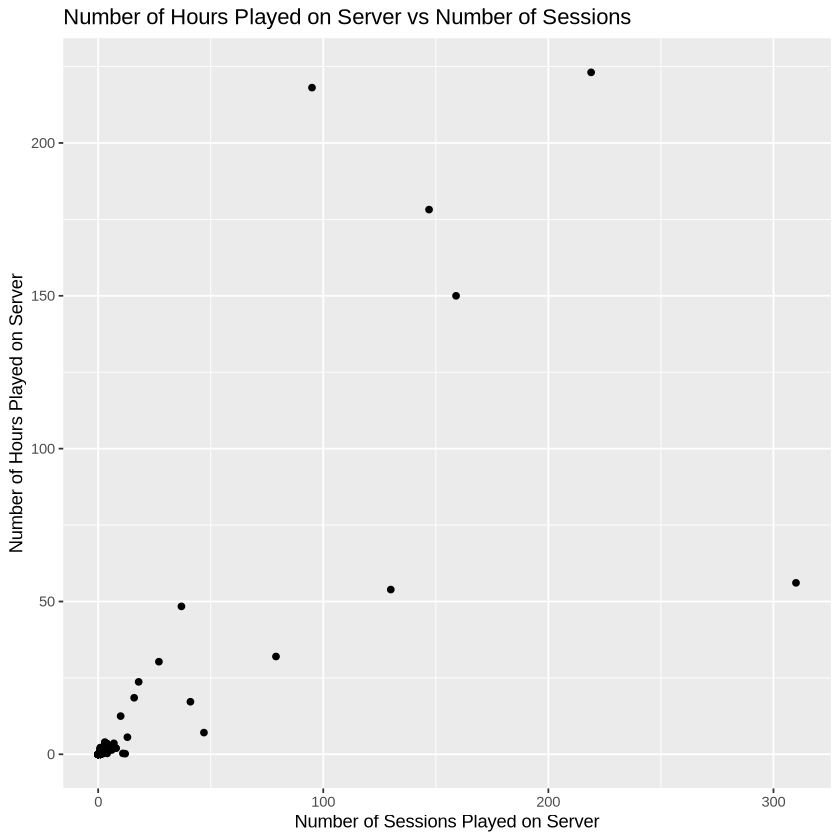

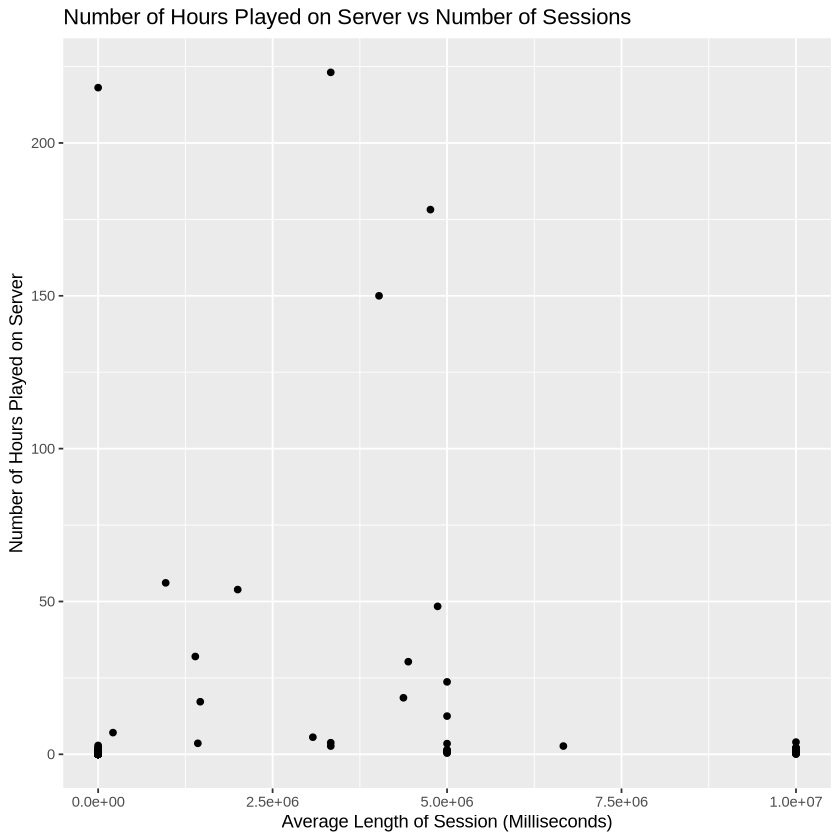

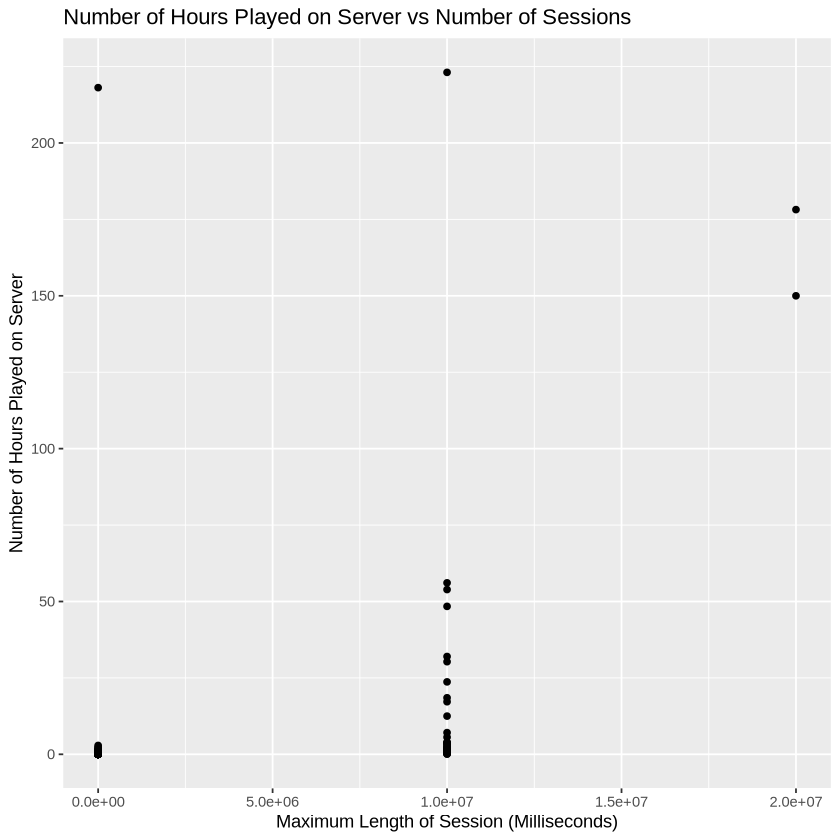

In [6]:
players_plot_sessions <- players_and_sc |>
    ggplot(aes(x = number_of_sessions, y = played_hours)) +
    geom_point() +
    labs(x = "Number of Sessions Played on Server", y = "Number of Hours Played on Server", 
         title = "Number of Hours Played on Server vs Number of Sessions")

players_plot_sessions

players_plot_average <- players_and_sc |>
    ggplot(aes(x = mean_duration, y = played_hours)) +
    geom_point() +
    labs(x = "Average Length of Session (Milliseconds)", y = "Number of Hours Played on Server", 
         title = "Number of Hours Played on Server vs Number of Sessions")

players_plot_average

players_plot_max <- players_and_sc |>
    ggplot(aes(x = max_duration, y = played_hours)) +
    geom_point() +
    labs(x = "Maximum Length of Session (Milliseconds)", y = "Number of Hours Played on Server",
         title = "Number of Hours Played on Server vs Number of Sessions")

players_plot_max

We can see a relatively weak relationship between "number_of_sessions", and a weak "mean_duration", and "max_duration" to "played_hours". However, using all three may provide a better insight into distribution. So from here, let's propose a question: "Can "number_of_sessions", "mean_duration", and "max_duration" predict the value of "played_hours""?

# (4) <br>

To do this, we'll use linear regression for a few reasons: <br>
We're predicting a numerical value <br>
There are little assumptions required to apply linear regression, as we are using numerical values to predict a numerical value. <br>
There are few limitations or weaknesses with linear regression, as the relationship appears to be relatively linear. <br>

To test this, we can use a comparison can be made by multiplying "mean_duration" with "number_of_sessions", in addition to using the actual value for "played_hours". Additionally, little validation will be needed for this method, other than the comparison previously stated.

For applying the model, we will be splitting the data once with the initial_split() function at the beginning into 75% training and 25% testing. The validation set will be our testing set, and cross validation will not be done.